<a href="https://colab.research.google.com/github/nishah8/dataandpython/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MOVIE PROJECT
Working with movie dataset to get information about ranks and genre

---


---



## Nirali Shah
Date: Sep 2023
---



## Objectives

Objective is to analyse the data and get information about most loved genres, most liked director and visualise information relating to distribution of genres in highly ranked movies.
---


## The dataset
data from: https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true
* Data set contains Movie Names, Year of Release, Director Information and Rating.
* In this section, I have extracted data from the csv file and made a dataset. It had a unsuable top row which needed to be taken off so i've used .drop()

---



In [ ]:
## describe the dataset (number of records, statistics, columns, etc)
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
moviedf = pd.read_csv(url)
moviedf.drop(moviedf.columns[0], axis=1,inplace = True)
print(moviedf)
print()
print(moviedf.info())

       first_name    last_name                                name  year  \
0             Les  12 Poissons                Rondo pour trompette  2002   
1         Lejaren     a'Hiller            Sleep of Cyma Roget, The  1920   
2        Khairiya    A-Mansour                    Churches in Iraq  1988   
3         Ricardo     A. Solla                            Foto, La  2001   
4         Ricardo     A. Solla                            Foto, La  2001   
...           ...          ...                                 ...   ...   
368889      Yusuf         Ünal                      Kalbim agliyor  1988   
368890      Ahmet        Ündag                 Ve gnese kan siradi  1972   
368891       Idil         Üner  Liebenden vom Hotel von Osman, Die  2001   
368892     Yüksel        Ünsal                   Evvel zaman iinde  1951   
368893     Yüksel        Ünsal                   Evvel zaman iinde  1951   

        rank        genre  
0        NaN        Short  
1        NaN        Drama  
2  

## Cleaning the data
2 separate dataset were extracted from from the main movie dataframe. One is a dataframe only has movies with ranks (ranked_movies) and other with only unranked movies (unranked_movies). In both the new dataframes, the index were reset.

* in the original dataframe (moviedf) instead of having directors first name and last name in separate columns - it was colated into a single column. After this first_name & last_name columns were dropped.
* In the ranked movies dataframe it is sorted on the basis of rank and year from highest to lowest.
* In the unranked movies dataframe it is sorted on basis of the year, from newest to oldest. The rank column is dropped because its irrevelent.

on working with the dataframe I have found that movies are repeated if they are multi genre. That means even when we have so many datapoints they are not entirely unique. I have therefore made an extra data frame which just has the information about the unique movies.

---


In [ ]:
## data cleaning code


#Director names are consolidated into a single column with the full name.
moviedf['full name'] = moviedf['first_name'] + ' ' + moviedf['last_name']
moviedf = moviedf.drop(columns=['first_name','last_name'])
print(moviedf.info())
print(moviedf.head())
print()

#making a dataframe of movies that are ranked
ranked_movies = moviedf.dropna(subset=['rank'])
ranked_movies = ranked_movies.sort_values(by=['rank','year'],ascending = False)
ranked_movies = ranked_movies.reset_index(drop=True)
print(ranked_movies.info())
print(ranked_movies.head())
print()
#this dataframe has only movies which are ranked sorted by rank & year.

#making a dataframe of unranked movies
unranked_movies = moviedf[moviedf['rank'].isna()]
unranked_movies = unranked_movies.drop(columns=['rank'])
unranked_movies = unranked_movies.sort_values(by=['year'],ascending = False)
unranked_movies = unranked_movies.reset_index(drop=True)
print(unranked_movies.info())
print(unranked_movies.head())
print()
#this dataframe has only movies which are uranked sorted by year. The column rank has been dropped out since it only contains nan values.

# Dataset of Unique movie names
unique = moviedf.drop_duplicates(subset=['name'], keep='first')
unique = unique.drop(columns=['genre'])
print('number of unique movies in the dataframe are:',len(unique))
print()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   name       368894 non-null  object 
 1   year       368894 non-null  int64  
 2   rank       113376 non-null  float64
 3   genre      368894 non-null  object 
 4   full name  368894 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 14.1+ MB
None
                       name  year  rank        genre           full name
0      Rondo pour trompette  2002   NaN        Short     Les 12 Poissons
1  Sleep of Cyma Roget, The  1920   NaN        Drama    Lejaren a'Hiller
2          Churches in Iraq  1988   NaN  Documentary  Khairiya A-Mansour
3                  Foto, La  2001   NaN        Drama    Ricardo A. Solla
4                  Foto, La  2001   NaN        Short    Ricardo A. Solla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113376 entries, 0 to 113375
Data columns (tota

## Analysing the data

Following analysis were done on the ranked movies dataframe:

* full summary statistics
* number of movies per genre
* mean rank per genre
* number of the directors with movies ranked >9
* year with highest number of movies ranked >9
* Genre with highest movies of rank over 9
* number of rank 9 or above movies by each unique directors and finding the most succesful director
* movies with highest rank
* percentage of ranked movies per genre with total movies


Because of the type of data in the dataframe with only one numerical information not much correlation analysis can be carried out. Also as explained in the last part, since data is not entirely unique - information as group would likely be skewed.

---



In [ ]:
## analysis code here

#for ranked movies only

#summary statistics of all the ranked movies
print(ranked_movies['rank'].describe())
print()


#number of movies per genre
gmov = ranked_movies.groupby('genre').size().reset_index(name='count')
print(gmov)
print()

#mean rank per genre
mean_rank_by_genre = ranked_movies.groupby('genre')['rank'].mean()
print(mean_rank_by_genre)
print()

#number of the directors with movies ranked >9
high_ranked = ranked_movies[ranked_movies['rank'] >= 9].copy()
directors = high_ranked['full name'].unique()
print('number of directors who have movies ranking over 9:',len(directors))
print()
#print()
#for director in directors:   (this is in case you want to see list of all the directors)
    #print(director)

#year with highest number of movies ranked >9
year_counts = high_ranked.groupby('year')['name'].nunique() #gets unique movies names per year
year_with_highest_count = year_counts.idxmax()
print("Year with the highest number of movies ranked over 9:", year_with_highest_count)
print()

# Genre with highest movies of rank over 9
genre_counts = high_ranked['genre'].value_counts()
genre_with_highest_count = genre_counts.idxmax()
print("Genre with the highest number of movies ranked over 9:", genre_with_highest_count)
print()

# number of rank 9 or above movies by each unique directors and finding the most succesful director
movie_counts = high_ranked.groupby('full name')['name'].nunique() #gets unique movies names per director
sorted_counts = movie_counts.sort_values(ascending=False)
director_with_highest_count = sorted_counts.idxmax()
print("Director with the highest count of movies ranked over 9:", director_with_highest_count, 'with', sorted_counts[0], 'movies on the list')
print()

# movies with highest rank
max_rank = high_ranked['rank'].max()
highest_rank_rows = high_ranked[high_ranked['rank'] == max_rank] #selects rows with the highest rank
unique_movies = highest_rank_rows.drop_duplicates(subset='name', keep='first')[['name', 'full name', 'year']]
unique_movies = unique_movies.reset_index(drop=True)
print('List of movies with the hightest rank of',max_rank)
print(unique_movies)
print()


#percentage of ranked movies per genre with total movies
grouped = moviedf.groupby('genre')
genre_stats = grouped.agg(totalmovies=('name', 'count'), rankedmovies=('rank', 'count'))
genre_stats['PercentageRanked'] = (genre_stats['rankedmovies'] / genre_stats['totalmovies']) * 100
genre_stats.reset_index(inplace=True)
print(genre_stats)
print()

#unranked movies grouped by genre
gmov_unranked = unranked_movies.groupby('genre').size().reset_index(name='count')


count    113376.000000
mean          5.995124
std           1.540330
min           1.000000
25%           5.100000
50%           6.200000
75%           7.100000
max           9.900000
Name: rank, dtype: float64

          genre  count
0        Action   5873
1     Adventure   3932
2     Animation   4727
3        Comedy  20633
4         Crime   4488
5   Documentary   4296
6         Drama  24696
7        Family   4845
8       Fantasy   2123
9     Film-Noir    415
10       Horror   4227
11        Music    908
12      Musical   2491
13      Mystery   2012
14      Romance   5476
15       Sci-Fi   2699
16        Short   9894
17     Thriller   5440
18          War   1837
19      Western   2364

genre
Action         5.365895
Adventure      5.619379
Animation      6.553628
Comedy         5.923196
Crime          5.861007
Documentary    6.659544
Drama          6.146169
Family         6.323344
Fantasy        5.882289
Film-Noir      6.702892
Horror         4.738325
Music          6.458921
Musical   

## Visualising the data

I have used to information gathered in the analysis to generate some visuals.
* number of movies per genre in bar chart.
* only highly ranked movies per genre charted
* plot of mean rank per genre
* two pie charts - one showing highly ranked movies and one with no rankings
* plot to see total movies and how many movies from it are ranked.
* the above chart as a percentage so it is easier to understand.

---



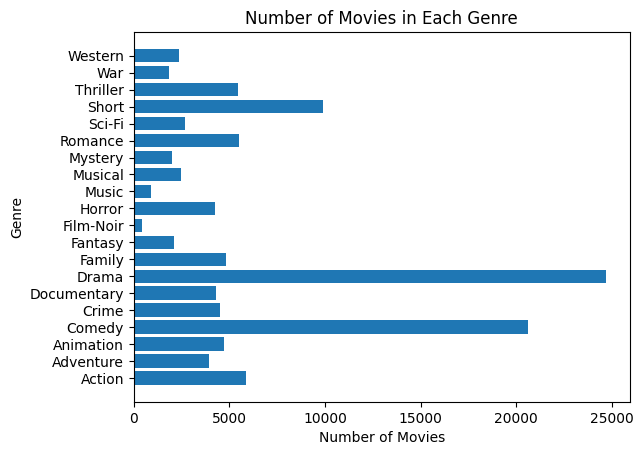

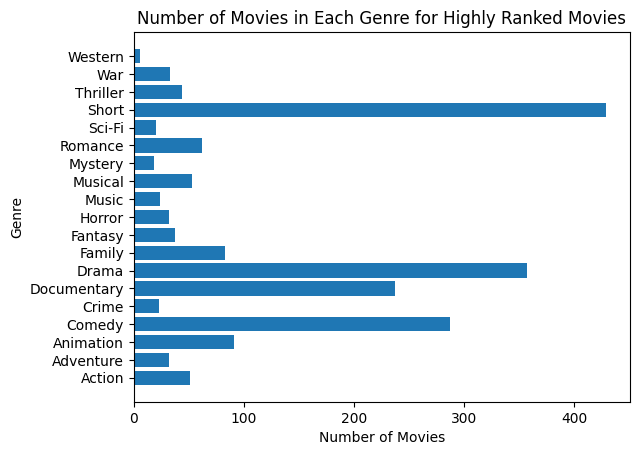

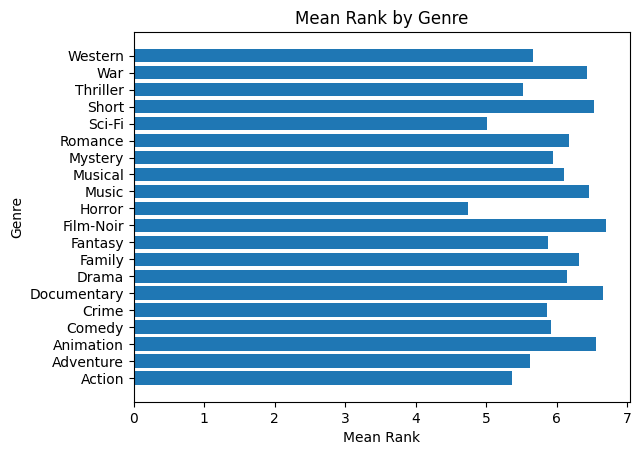

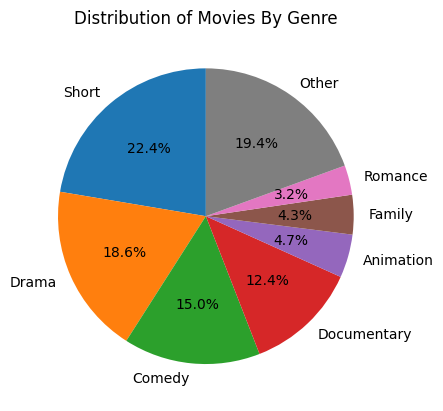

Genres in 'Other': Musical, Action, Thriller, Fantasy, War, Horror, Adventure, Music, Crime, Sci-Fi, Mystery, Western



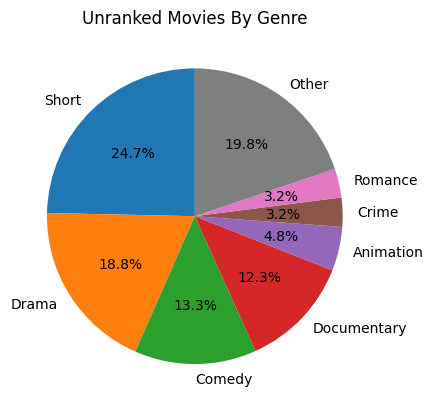

Genres in 'Other': Action, Family, Western, Thriller, Adventure, Musical, Music, Horror, Mystery, Fantasy, War, Sci-Fi, Film-Noir



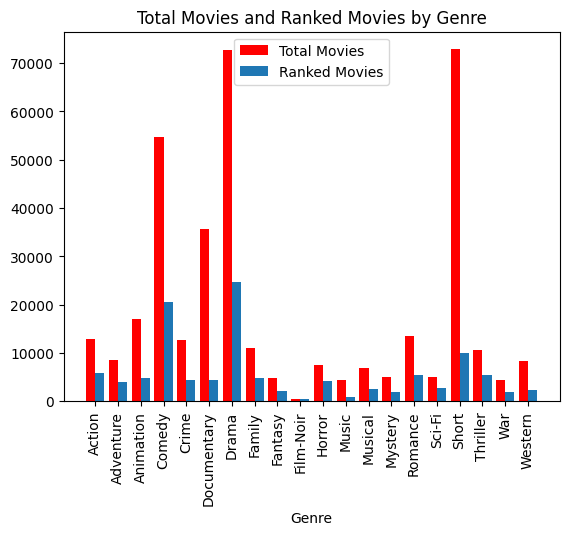

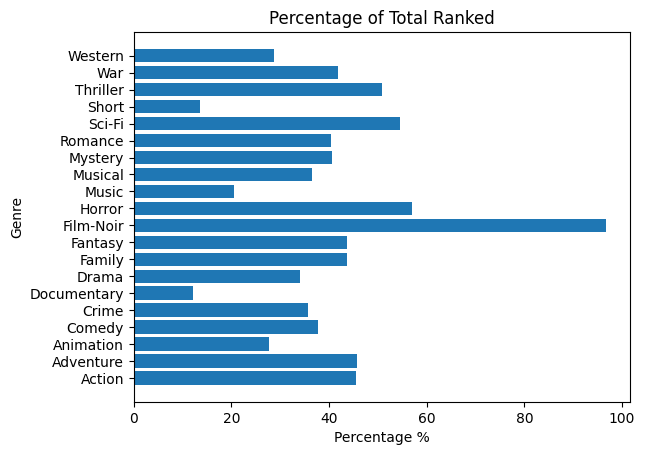

In [ ]:
## visualisation code here

# number of movies in each genre visualised.
plt.barh(gmov['genre'], gmov['count'])
plt.ylabel('Genre')
plt.xlabel('Number of Movies')
plt.title('Number of Movies in Each Genre')
plt.show()

#number of movies in each genre visualised only for highly ranked movies
gmov_high = high_ranked.groupby('genre').size().reset_index(name='count')
plt.barh(gmov_high['genre'], gmov_high['count'])
plt.ylabel('Genre')
plt.xlabel('Number of Movies')
plt.title('Number of Movies in Each Genre for Highly Ranked Movies')
plt.show()

# Plotting a chart of mean rank and genre
plt.barh(mean_rank_by_genre.index, mean_rank_by_genre.values)
plt.ylabel('Genre')
plt.xlabel('Mean Rank')
plt.title('Mean Rank by Genre')
plt.show()

#function to do pie charts
def pie_charts (df,threshold,title,x):
  genre_counts = df.value_counts()
  small_slices = genre_counts[genre_counts / genre_counts.sum() < threshold]
  other_count = small_slices.sum()
  other_genres = list(small_slices.index)
  genre_counts = genre_counts[~genre_counts.index.isin(other_genres)]
  genre_counts['Other'] = other_count
  plt.pie(genre_counts, labels=genre_counts.index, autopct='%.1f%%', startangle=90)
  plt.title(title)
  plt.show()
  other_genres_str = ', '.join(other_genres) # to remove [] &, and have cleaner output
  print(x,"in 'Other':", other_genres_str)
  print()

# Create a pie chart of movies by genres in the highest ranked list
pie_charts(high_ranked['genre'],0.03,'Distribution of Movies By Genre','Genres')


#Unranked Movies by Genre
pie_charts(unranked_movies['genre'],0.03,'Unranked Movies By Genre','Genres')


# Plot Total Movies & Ranked Movies
x = range(len(genre_stats['genre']))
plt.bar(x, genre_stats['totalmovies'], label='Total Movies',width=0.4, align='center',color = 'red')
plt.bar([i + 0.4 for i in x], genre_stats['rankedmovies'], width=0.4, label='Ranked Movies', align='center')
plt.xlabel('Genre')
plt.xticks([i + 0.2 for i in x], genre_stats['genre'])
plt.title('Total Movies and Ranked Movies by Genre')
plt.xticks(rotation=90)
plt.legend()
plt.show()


# percentage plot
plt.barh(genre_stats['genre'], genre_stats['PercentageRanked'])
plt.ylabel('Genre')
plt.xlabel('Percentage %')
plt.title('Percentage of Total Ranked')
plt.show()


# Summary

All the analysis helps us gather data about kind of movies that get the best ratings, the genres people seem to prefer and directors whose work has been liked the most. The charts make grouped information easier to understand.

Learning outcomes due to the final project:

Through this data project, I have had the chance to use a diverse array of functions and analytic tools using Pandas. As a direct consequence of this, my proficiency in Python has seen remarkable improvement.

In this project in terms of analysis, I've done some statistical analyis, played with sorting and extracting pieces of information. All this was done with dataframes built and cleaned from a csv file.

I’ve gotten a chance to use visualisation methods and to make decisions on which kind of graphs work for my analysis outcome.I tried doing a lot of different formatting to make sure the information is readable and easy to understand – this required me to do self-study to get what visual I wanted.

I wanted to try correlation analysis but the information in the data wasn’t appropriate for that. In near future I will try to practice some more correlation on other data sets.